In [1]:
%pip install boto3

Note: you may need to restart the kernel to use updated packages.


In [1]:
import json
import os
import sys
import boto3

In [2]:
client = boto3.client("bedrock-runtime")

In [3]:
# create sales.csv file
import csv

data = [
    ["date", "product_id", "price", "units_sold"],
    ["2023-01-01", "P001", 50, 20],
    ["2023-01-02", "P002", 60, 15],
    ["2023-01-03", "P001", 50, 18],
    ["2023-01-04", "P003", 70, 30],
    ["2023-01-05", "P001", 50, 25],
    ["2023-01-06", "P002", 60, 22],
    ["2023-01-07", "P003", 70, 24],
    ["2023-01-08", "P001", 50, 28],
    ["2023-01-09", "P002", 60, 17],
    ["2023-01-10", "P003", 70, 29],
    ["2023-02-11", "P001", 50, 23],
    ["2023-02-12", "P002", 60, 19],
    ["2023-02-13", "P001", 50, 21],
    ["2023-02-14", "P003", 70, 31],
    ["2023-03-15", "P001", 50, 26],
    ["2023-03-16", "P002", 60, 20],
    ["2023-03-17", "P003", 70, 33],
    ["2023-04-18", "P001", 50, 27],
    ["2023-04-19", "P002", 60, 18],
    ["2023-04-20", "P003", 70, 32],
    ["2023-04-21", "P001", 50, 22],
    ["2023-04-22", "P002", 60, 16],
    ["2023-04-23", "P003", 70, 34],
    ["2023-05-24", "P001", 50, 24],
    ["2023-05-25", "P002", 60, 21]
]

# Write data to sales.csv
with open('sales.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data)

print("sales.csv has been created!")

sales.csv has been created!


In [4]:
# Create the prompt
# Analyzing sales

prompt_data = """

Human: You have a CSV, sales.csv, with columns:
- date (YYYY-MM-DD)
- product_id
- price
- units_sold

Create a python program to analyze the sales data from a CSV file. The program should be able to read the data, and determine below:

- Total revenue for the year
- The product with the highest revenue
- The date with the highest revenue
- Visualize monthly sales using a bar chart

Ensure the code is syntactically correct, bug-free, optimized, not span multiple lines unnessarily, and prefer to use standard libraries. Return only python code without any surrounding text, explanation or context.

Assistant:
"""

In [5]:
# Claude - Body Syntex
body = json.dumps({
                    "prompt": prompt_data,
                    "max_tokens_to_sample":4096,
                    "temperature":0.5,
                    "top_k":250,
                    "top_p":0.5,
                    "stop_sequences": ["\n\nHuman:"]
                  }) 

In [7]:
modelId = 'anthropic.claude-v2' # change this to use a different version from the model provider
accept = 'application/json'
contentType = 'application/json'

resp = client.invoke_model(body=body, modelId=modelId, accept=accept, contentType=contentType)


In [8]:
body = json.loads(resp.get('body').read())



In [9]:
body.get('completion')

" Here is the Python code to analyze sales data from a CSV file:\n\n```python\nimport csv\nfrom collections import defaultdict\nimport matplotlib.pyplot as plt\n\nrevenue = 0\nmax_revenue = 0\nmax_revenue_product = None\nmax_revenue_date = None\nmonthly_sales = defaultdict(int)\n\nwith open('sales.csv') as f:\n    reader = csv.reader(f)\n    next(reader) # skip header\n    for row in reader:\n        date, product, price, units = row\n        revenue += float(price) * int(units)\n        product_revenue = float(price) * int(units)\n        if product_revenue > max_revenue:\n            max_revenue = product_revenue\n            max_revenue_product = product\n            max_revenue_date = date\n        month = date.split('-')[1]\n        monthly_sales[month] += product_revenue\n        \nprint(f'Total revenue: {revenue}') \nprint(f'Product with highest revenue: {max_revenue_product}')\nprint(f'Date with highest revenue: {max_revenue_date}')\n\nplt.bar(monthly_sales.keys(), monthly_sale

Total revenue: 1000.0
Product with highest revenue: P001
Date with highest revenue: 2023-01-01


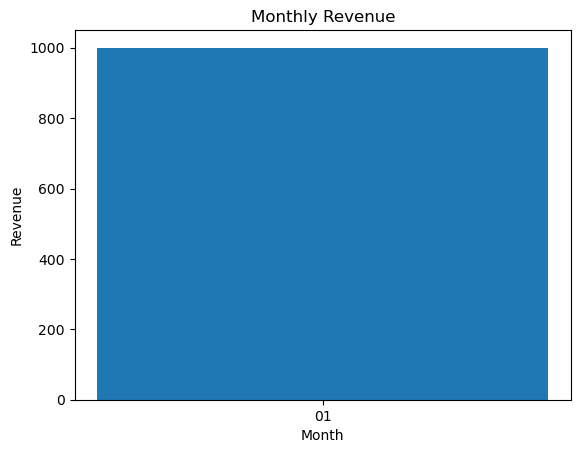

Total revenue: 4900.0
Product with highest revenue: P003
Date with highest revenue: 2023-01-04


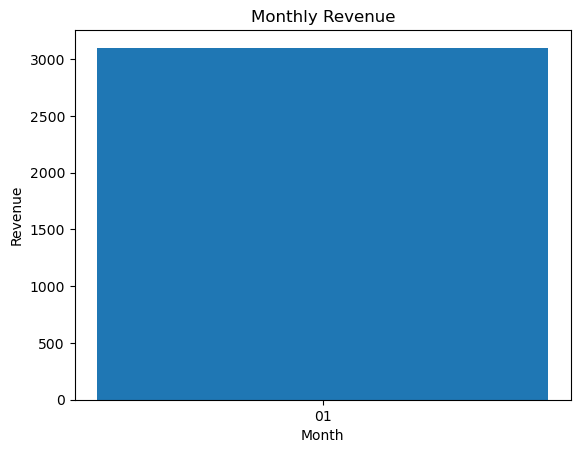

Total revenue: 19110.0
Product with highest revenue: P003
Date with highest revenue: 2023-02-14


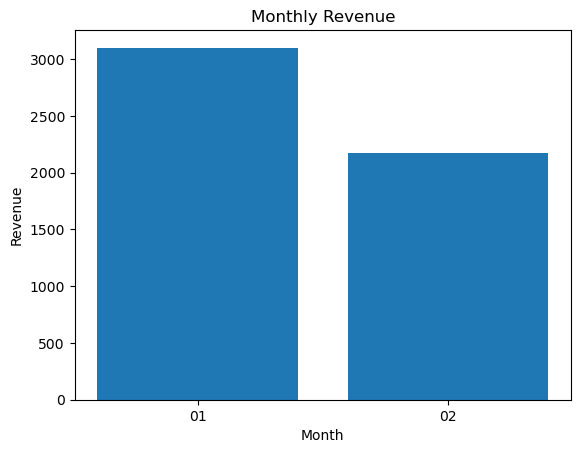

Total revenue: 23920.0
Product with highest revenue: P003
Date with highest revenue: 2023-03-17


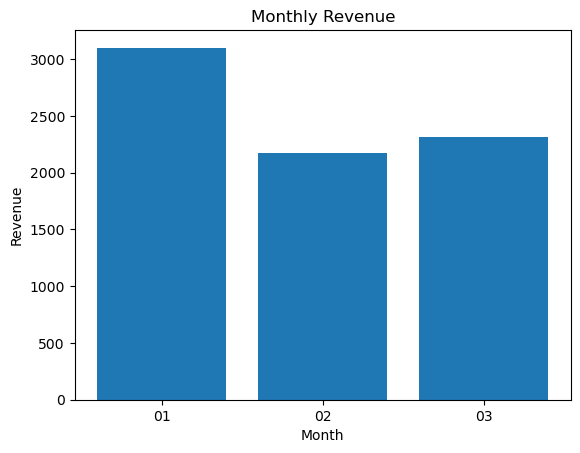

Total revenue: 33030.0
Product with highest revenue: P003
Date with highest revenue: 2023-04-23


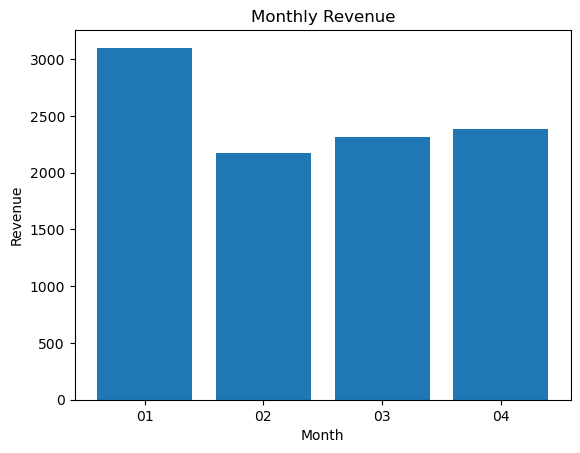

In [13]:
# outputed code

import csv
from collections import defaultdict
import matplotlib.pyplot as plt

revenue = 0
max_revenue = 0
max_revenue_product = None
max_revenue_date = None
monthly_sales = defaultdict(int)
with open('sales.csv') as f:
    reader = csv.reader(f)
    next(reader) # skip header
    for row in reader:
        date, product, price, units = row
        revenue += float(price) * int(units)
        product_revenue = float(price) * int(units)
        if product_revenue > max_revenue:
            max_revenue = product_revenue
            max_revenue_product = product
            max_revenue_date = date
            month = date.split('-')[1]
            monthly_sales[month] += product_revenue
            
            print(f'Total revenue: {revenue}') 
            print(f'Product with highest revenue: {max_revenue_product}')
            print(f'Date with highest revenue: {max_revenue_date}')
            
            plt.bar(monthly_sales.keys(), monthly_sales.values())
            plt.xlabel('Month')
            plt.ylabel('Revenue')
            plt.title('Monthly Revenue')
            plt.show()